In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam


In [12]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
def plot_samples(x, y, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

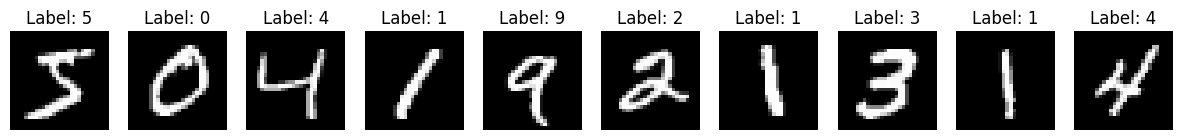

In [15]:
plot_samples(x_train, y_train, num_samples=10)

In [16]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 111514 (435.60 KB)
Trainable params: 11151

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.8131 - accuracy: 0.7486 - val_loss: 0.4909 - val_accuracy: 0.8446
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4306 - accuracy: 0.8655 - val_loss: 0.3603 - val_accuracy: 0.8849
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3722 - accuracy: 0.8838 - val_loss: 0.3218 - val_accuracy: 0.8986
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3403 - accuracy: 0.8938 - val_loss: 0.2955 - val_accuracy: 0.9117
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3213 - accuracy: 0.9011 - val_loss: 0.2995 - val_accuracy: 0.9080
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3046 - accuracy: 0.9047 - val_loss: 0.3053 - val_accuracy: 0.9049
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2941 - accuracy: 0.9082 - val_loss: 0.2658 - val_accuracy:

In [23]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [24]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.9491
Test accuracy: 0.9491000175476074


In [25]:
# Predict the classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.97      0.94      0.95       982
           5       0.98      0.88      0.93       892
           6       0.95      0.97      0.96       958
           7       0.95      0.96      0.95      1028
           8       0.91      0.93      0.92       974
           9       0.91      0.95      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [26]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.9497551897797688
Recall_Score:  0.9491
F1_Score:  0.9490487833661239


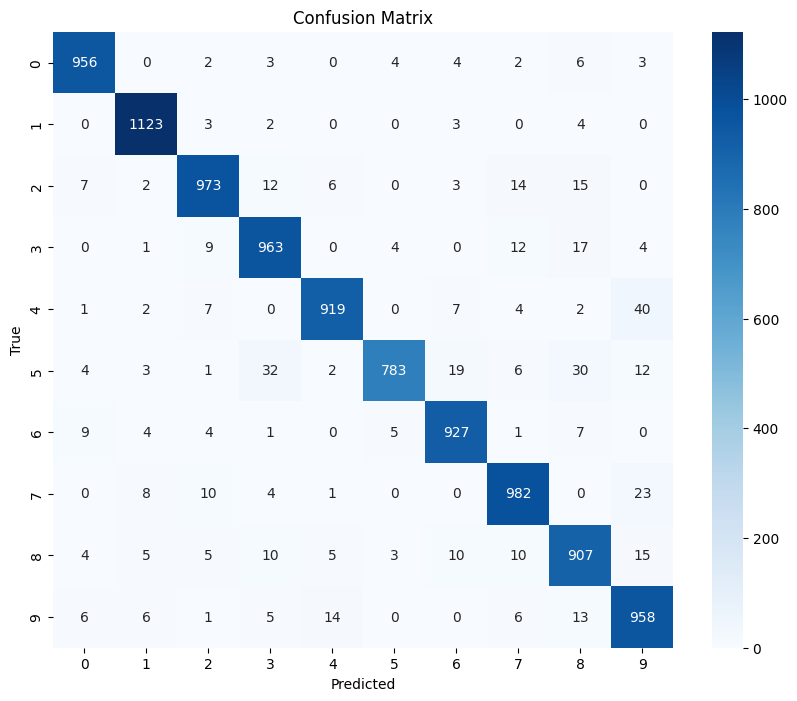

In [28]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
import seaborn as sns
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

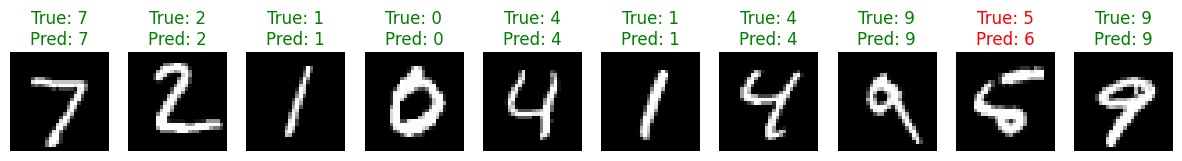

In [29]:
# Function to plot some images from the dataset along with their predictions
def plot_samples_with_predictions(x, y_true, y_pred, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}", color='green' if y_true[i] == y_pred[i] else 'red')
        plt.axis('off')
    plt.show()

# Plot some samples from the test set with actual and predicted labels
plot_samples_with_predictions(x_test, y_test, y_pred_classes, num_samples=10)